In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

In [2]:
test_table = pl.read_csv('./dataset/2.Translation_Test/test_table.csv')
user_table = pl.read_csv('./dataset/2.Translation_Test/user_table.csv')

In [6]:
test_table = test_table.with_columns(
   pl.col('date').str.to_datetime('%Y-%m-%d')
)
test_table.head()

user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
i64,datetime[μs],str,str,str,str,str,i64,i64
315281,2015-12-03 00:00:00,"""Direct""","""Web""","""ES""","""NA""","""IE""",1,0
497851,2015-12-04 00:00:00,"""Ads""","""Web""","""ES""","""Google""","""IE""",0,1
848402,2015-12-04 00:00:00,"""Ads""","""Web""","""ES""","""Facebook""","""Chrome""",0,0
290051,2015-12-03 00:00:00,"""Ads""","""Mobile""","""Other""","""Facebook""","""Android_App""",0,1
548435,2015-11-30 00:00:00,"""Ads""","""Web""","""ES""","""Google""","""FireFox""",0,1


In [7]:
table = test_table.join(user_table, on='user_id', how='left')
table.head()

user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
i64,datetime[μs],str,str,str,str,str,i64,i64,str,i64,str
315281,2015-12-03 00:00:00,"""Direct""","""Web""","""ES""","""NA""","""IE""",1,0,"""M""",32,"""Spain"""
497851,2015-12-04 00:00:00,"""Ads""","""Web""","""ES""","""Google""","""IE""",0,1,"""M""",21,"""Mexico"""
848402,2015-12-04 00:00:00,"""Ads""","""Web""","""ES""","""Facebook""","""Chrome""",0,0,"""M""",34,"""Spain"""
290051,2015-12-03 00:00:00,"""Ads""","""Mobile""","""Other""","""Facebook""","""Android_App""",0,1,"""F""",22,"""Mexico"""
548435,2015-11-30 00:00:00,"""Ads""","""Web""","""ES""","""Google""","""FireFox""",0,1,"""M""",19,"""Mexico"""


In [11]:
test_table = test_table.with_columns(
    pl.col('ads_channel').replace('NA', None)
)

In [12]:
test_table.describe()

statistic,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
str,f64,str,str,str,str,str,str,f64,f64
"""count""",453321.0,"""453321""","""453321""","""453321""","""453321""","""181877""","""453321""",453321.0,453321.0
"""null_count""",0.0,"""0""","""0""","""0""","""0""","""271444""","""0""",0.0,0.0
"""mean""",499937.514728,"""2015-12-02 08:56:07.976334""",null,null,null,null,null,0.049579,0.476446
"""std""",288665.193436,null,null,null,null,null,null,0.217073,0.499445
"""min""",1.0,"""2015-11-30 00:00:00""","""Ads""","""Mobile""","""EN""","""Bing""","""Android_App""",0.0,0.0
"""25%""",249816.0,"""2015-12-01 00:00:00""",null,null,null,null,null,0.0,0.0
"""50%""",500019.0,"""2015-12-03 00:00:00""",null,null,null,null,null,0.0,0.0
"""75%""",749522.0,"""2015-12-04 00:00:00""",null,null,null,null,null,0.0,1.0
"""max""",1e6,"""2015-12-04 00:00:00""","""SEO""","""Web""","""Other""","""Yahoo""","""Safari""",1.0,1.0


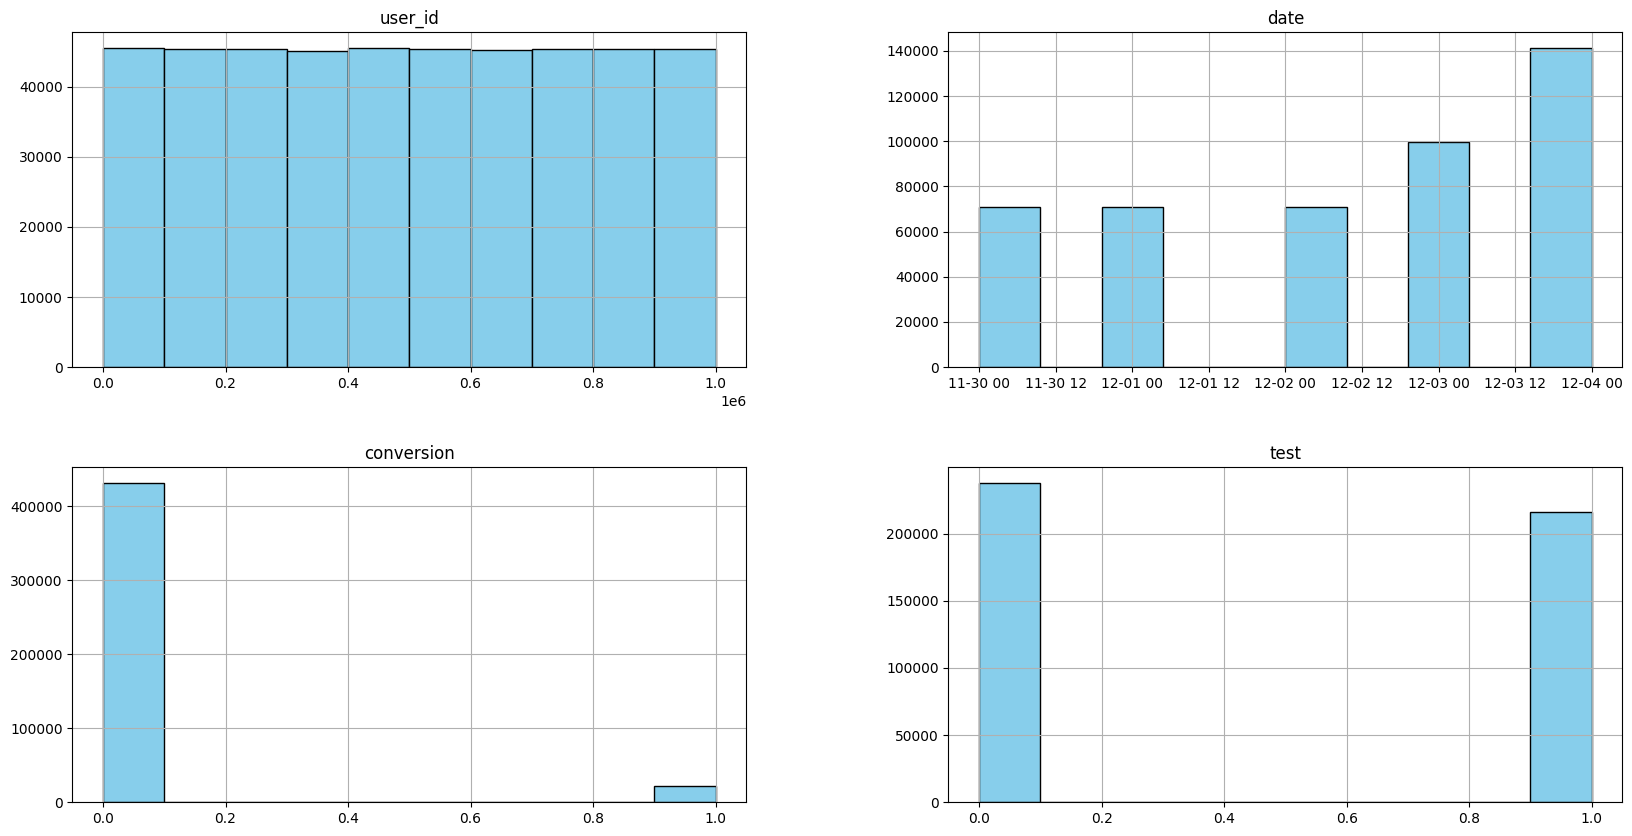

In [15]:
test_table.to_pandas().hist(edgecolor='black', color='skyblue', figsize=(20, 10))
plt.show()

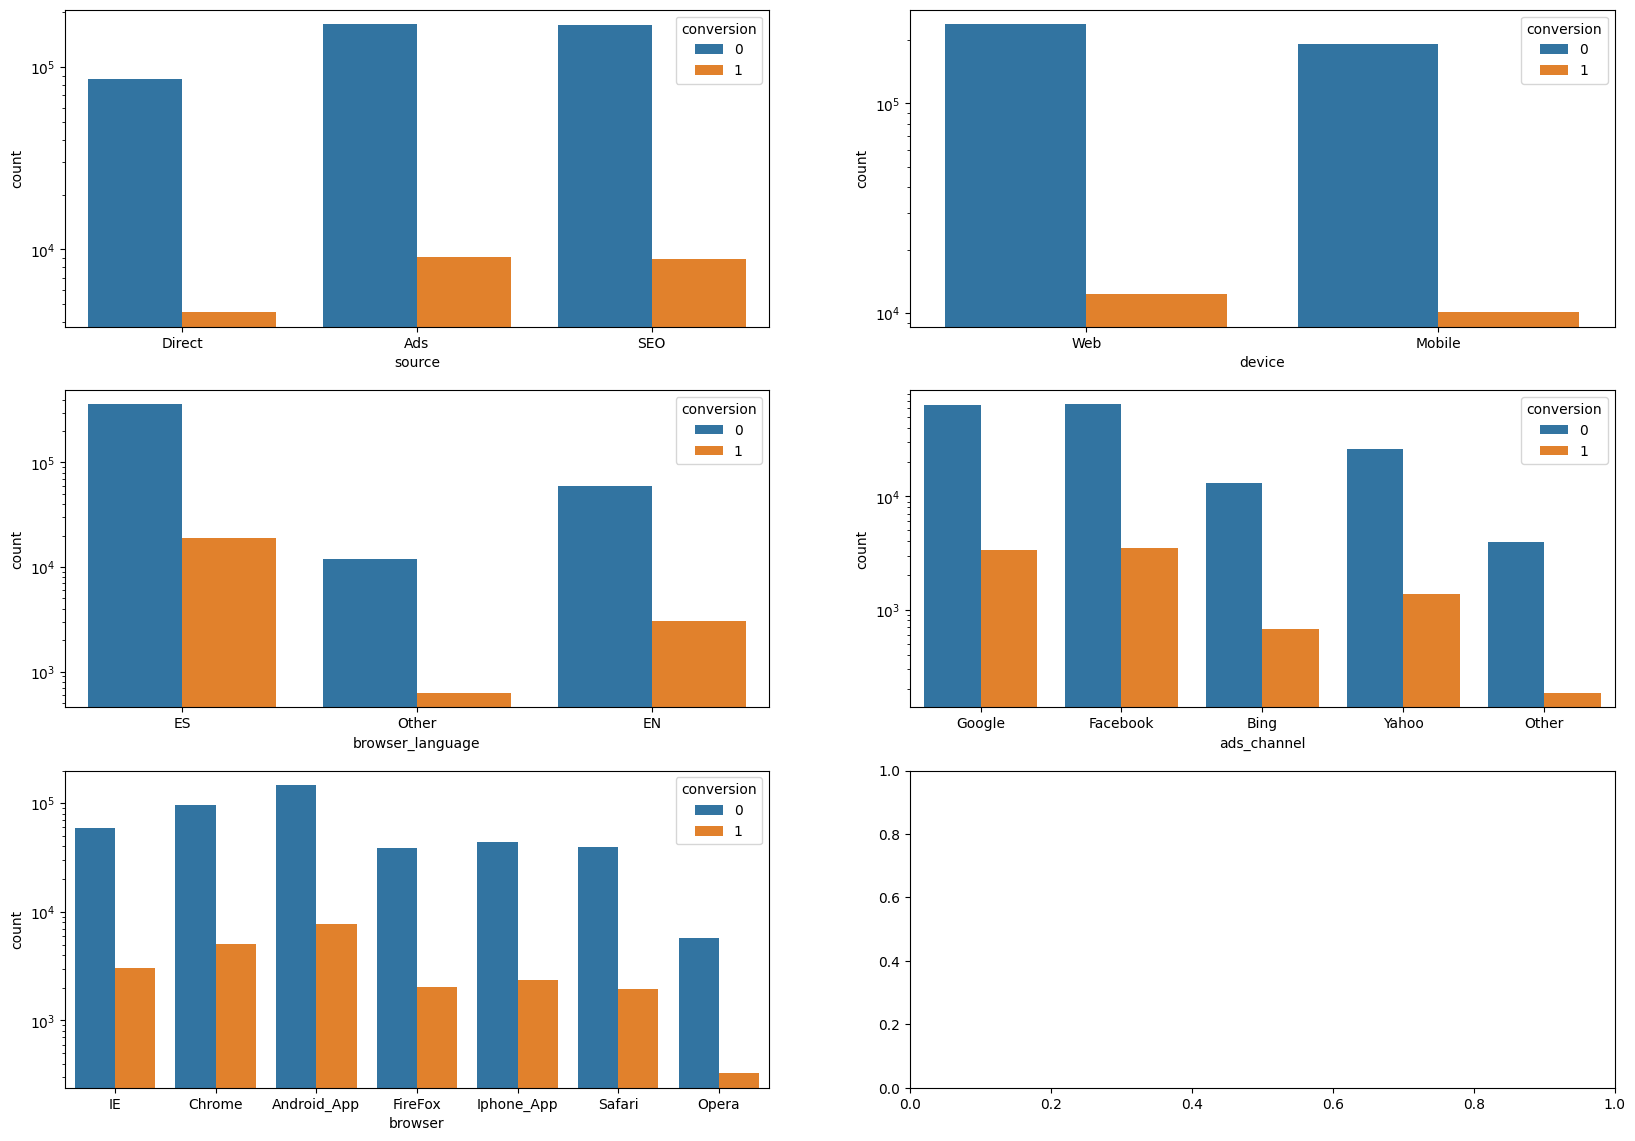

In [17]:
cates = ['source', 'device', 'browser_language', 'ads_channel', 'browser']
fig, ax = plt.subplots(3, 2, figsize=(20, 14))

for i, cate in enumerate(cates):
    sns.countplot(x=cate, hue='conversion', data=test_table.to_pandas(), ax=ax[i//2, i%2])
    ax[i//2, i%2].set_yscale('log')
plt.show()

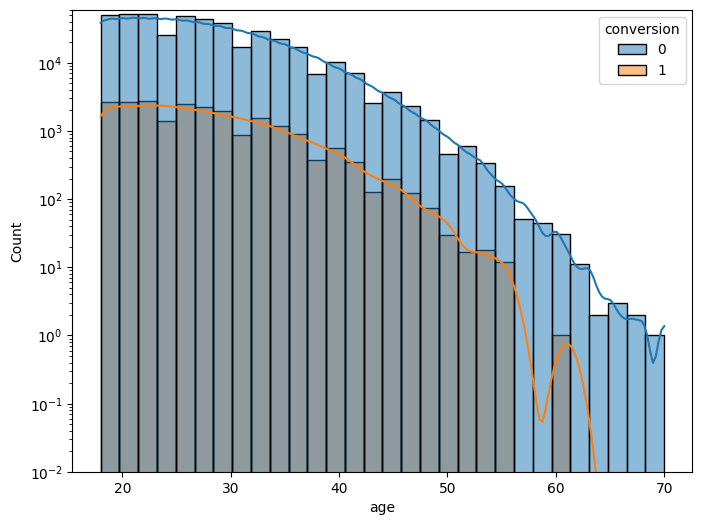

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=table.to_pandas(), x='age', hue='conversion', bins=30, kde=True)
plt.ylim(0.01, 60000)
plt.yscale('log')
plt.show()

In [21]:
user_table['country'].unique().to_list()

['Costa Rica',
 'El Salvador',
 'Honduras',
 'Mexico',
 'Colombia',
 'Bolivia',
 'Venezuela',
 'Nicaragua',
 'Ecuador',
 'Uruguay',
 'Spain',
 'Argentina',
 'Guatemala',
 'Peru',
 'Chile',
 'Panama',
 'Paraguay']